# Federico Campanozzi - Progetto Data Intensive con Relazione
                                                                                                             a.a. 2021/2022

## 1 - Descrizione del problema

Il problema è determinare se una transazione è fraudolenta oppure no.

### 1.1 - Descrizione del Dataset

Le colonne del dataset sono così definite : 
- step: rappresenta un'unita di tempo 1 = 1 ora
- type: tipo di transazione
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction
- isFlaggedFraud : il risultato del modello predittivo

## 2- Analisi esplorativa

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
transactions = pd.read_csv("../data/data.csv")
transactions[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Estraiamo dal dataframe tutte le informazioni statistiche e gli aggiungiamo anche altre due informazione
che possono essere utili per capire la distribuzione dei dati, ovvero il numero di valori distinti e il numero
di valori nulli.

In [5]:
vMtx = transactions.describe().values
vMtx = np.vstack([vMtx, [len(transactions[c].unique()) for c in ["step","amount","oldbalanceOrg",
                                                                 "newbalanceOrig","oldbalanceDest","newbalanceDest",
                                                                 "isFraud","isFlaggedFraud"]]])
vMtx = np.vstack([vMtx, transactions.describe().isna().sum().values])
pd.DataFrame(data=vMtx,
             index=['count','mean','std','min','25%','50%','75%','max','valori distinti','valori nulli'],
             columns=transactions.describe().columns)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00
valori distinti,7.430000e+02,5.316900e+06,1.845844e+06,2.682586e+06,3.614697e+06,3.555499e+06,2.000000e+00,2.000000e+00
valori nulli,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### 2.1 - Grafici

Ho creato dei grafici per le transazioni fraudolente per far capire (graficamente) quanto il numero di istanze
siano differenti e quanto il tipo di transazione (colonna "type") incida.

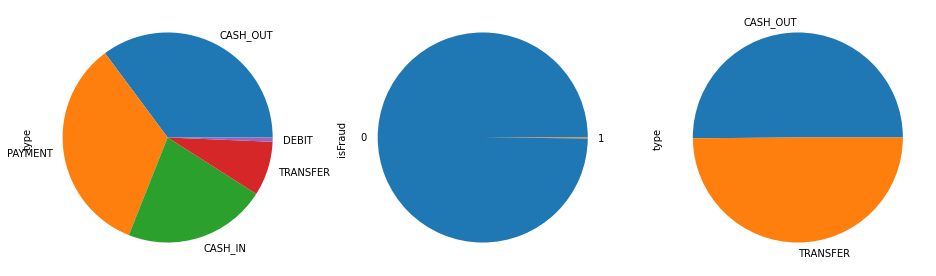

In [6]:
plt.figure(figsize=(16, 10))
transactions["type"].value_counts().plot.pie(ax=plt.subplot(1, 3, 1));
transactions["isFraud"].value_counts().plot.pie(ax=plt.subplot(1, 3, 2));
transactions[transactions["isFraud"] == 1]["type"].value_counts().plot.pie(ax=plt.subplot(1, 3,3));

In [7]:
feature_list = ["type","amount","oldbalanceOrg","newbalanceOrig"]

Per visualizzare le feauter si può procedere in diversi modi. Quello proposto in questo progetto è la creazione
di n grafici che combina 2 feature alla volta. Questo approccio può andare bene se il numero di feature è ridotto (<10)
altrimenti bisogna procedere a buon senso creando manualmente i grafici di quelle feature che potrebbero essere
in qualche modo dipendente.

Per fare questo esperimento usiamo un numero di istanze maggiori per avere una porzione di dataset più significativa.

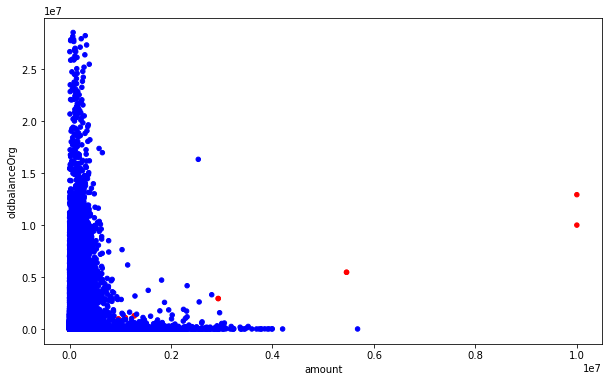

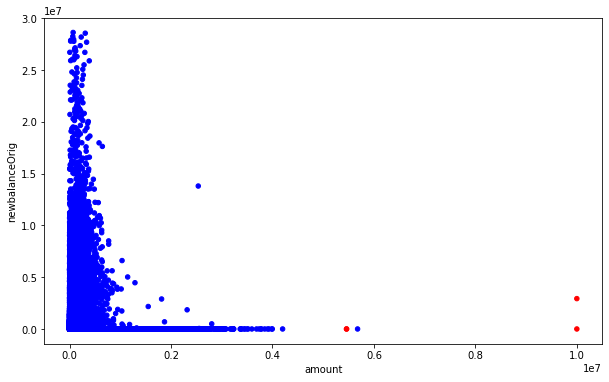

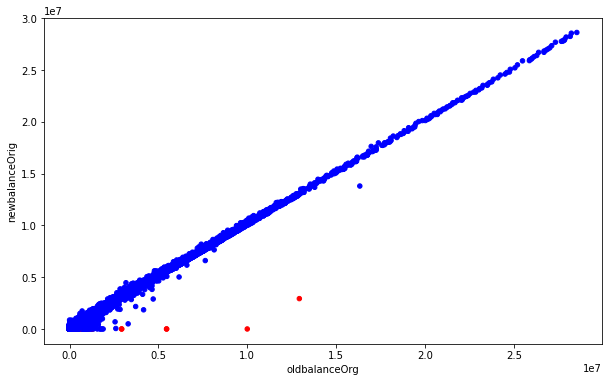

In [8]:
transactions = pd.read_csv("../data/data.csv", nrows=40_000)
tfraut_colors = transactions["isFraud"].map({0: "blue", 1: "red"})
for f_i in range(1,len(feature_list)):
     for f_j in range(f_i + 1, len(feature_list)) :        
        transactions.plot.scatter(feature_list[f_i], feature_list[f_j], c=tfraut_colors, figsize=(10, 6));

## 3 - Normalizzazione dei dati

In questo progetto non abbiamo molte pre-elaborazioni da fare, dato il numero ridotto di feature.

Per prima cosa dividiamo le feature in due categorie (perchè andranno poi trattate diversamente) :
   - Feature Numeriche : Possiamo applicare una normalizzazione dei dati per avere la stessa scala
   - Feature Categoriche : Applichiamo una categorizzazione. L'unica colonna da trattare in questo caso è 
       il tipo di transazione. Da questa operazioone de derivano altre 5.

In [9]:
feature_numeric = ["amount","oldbalanceOrg","newbalanceOrig"]
feature_categorical = ["type"]

Grazie alla classe ColumnTransformer possiamo applica entrambe queste trasformazioni in modo semplice.
L'oggeto ColumnTrasn lo memorizziamo in una variabile così lo possiamo riutilizzare anche per la creazione dei modelli nelle fasi successive

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

preproc = ColumnTransformer(
    [
        ("numeric",StandardScaler(),feature_numeric),
        ("categorical",OneHotEncoder(),feature_categorical)
    ],remainder="drop")

Il risultato saranno quindi le 3 colonne numeriche ("amount", "oldbalanceOrg", "newbalanceOrig") dove abbiamo applicato una normalizzazione e le 5 colonne derivate dalla trasformazione della variabile categorica type nelle sue n componenti binarie, una per ogni valore distinto di type (in questo dataset sono 5 : CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER)

In [11]:
X_sample = transactions[feature_numeric + feature_categorical]
preproc.fit_transform(X_sample)
f_names = feature_numeric + list(preproc.named_transformers_["categorical"].get_feature_names())
pd.DataFrame(
    preproc.transform(X_sample),
    columns = f_names
).head(10)

,amount,oldbalanceOrg,newbalanceOrig,x0_CASH_IN,x0_CASH_OUT,x0_DEBIT,x0_PAYMENT,x0_TRANSFER
0,-0.439241,-0.266896,-0.273043,0.0,0.0,0.0,1.0,0.0
1,-0.464742,-0.331287,-0.333001,0.0,0.0,0.0,1.0,0.0
2,-0.470125,-0.340399,-0.341250,0.0,0.0,0.0,0.0,1.0
3,-0.470125,-0.340399,-0.341250,0.0,1.0,0.0,0.0,0.0
4,-0.433394,-0.322506,-0.328533,0.0,0.0,0.0,1.0,0.0
5,-0.445706,-0.317184,-0.321659,0.0,0.0,0.0,1.0,0.0
6,-0.447976,-0.261248,-0.266324,0.0,0.0,0.0,1.0,0.0
7,-0.445566,-0.264322,-0.269670,0.0,0.0,0.0,1.0,0.0
8,-0.457835,-0.339322,-0.341250,0.0,0.0,0.0,1.0,0.0
9,-0.453636,-0.322434,-0.325769,0.0,0.0,1.0,0.0,0.0


### 3.1 - PCA

Con la decomposizione SVD (Single Value Decomposition) possiamo riportare una spazio k-dimensionale in uno spazio n-dimensionale. In questo progetto le dimensioni originali sono il numero di feature dopo aver applicato il pre-processing, quindi 8, in uno spazio bidimensionale, per poter visualizzare i dati in un classico grafico cartesiano.

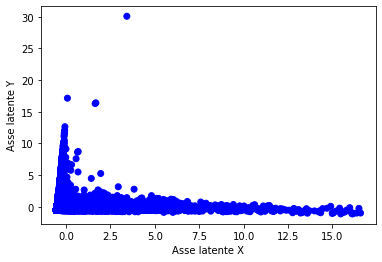

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

c_map = transactions[:X_train.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
x_preproc = pca.fit_transform(preproc.fit_transform(X_train))

plt.scatter(x_preproc[:,0], x_preproc[:,1], c=c_map)
plt.xlabel('Asse latente X')
plt.ylabel('Asse latente Y')
plt.show()

## 4 - Modelli Predittivi

Data il grande numero di istanze in questo dataset alcuni modelli potrebbe crashare. Quindi riduciamo il dataset.

In [13]:
from sklearn.pipeline import Pipeline
transactions = pd.read_csv("../data/data.csv", nrows=20_000)
X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

Predisponaimo alcune "Utility Function" che migliorano la leggibilità del codice e riusabilità. In particolare definiamo alcune funzioni per il calcolo delle accuratezze divise in :
 - Plotting Functions
 - Accurancy Functions
 - Others Functions

In [14]:
# Plotting Functions
def plot_separator_on_data(X, y, model=None):
    '''plot data into 2d space'''
    c_map = transactions[:X.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
    X = np.array(X)
    plt.figure(figsize=(8, 6));
    plt.scatter(X[:, 0], X[:, 1], c=c_map)
    if model is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        sep_x = np.linspace(*xlim, 2)
        sep_y = separator_2d(model, sep_x)
        plt.plot(sep_x, sep_y, c="green", linewidth=2)
        plt.xlim(xlim)
        plt.ylim(ylim)
    return None

def separator_2d(model, x1):
    '''draw a 2d line based his equation'''
    w = model.coef_[0]
    b = model.intercept_[0]
    return -x1 * w[0] / w[1] - b / w[1]

In [18]:
# Accurancy Functions
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, confusion_matrix, mean_squared_error

def rmspe(y_real, y_pred):
    '''Root Mean Squared Percentage Error'''
    if not y_real.all() > 0 : 
        print(y_real)
        print(y_pred)
        return -1
    return np.sqrt(np.mean((y_pred /y_real - 1) ** 2))

def print_eval_regressor(X, y, model):
    '''print eval for regression model'''
    y_pred = model.predict(X)
    y = y.values.ravel()
    print(f"MSE   : {mean_squared_error(y, y_pred):12.4f}")    
    print(f"RMSPE : {rmspe(y, y_pred):12.4f}")
    print_eval_base(X, y, model)
    return None

def print_eval_base(X, y, model, pad = 3):
    '''print eval for all model, only R^2 score '''
    print(f"R^2{''.rjust(pad, ' ')}: {model.score(X,y):12.4f}")
    return None

def print_eval_classify(X, y, model, classes):
    '''print eval for classification model'''
    y_pred = model.predict(X)    
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix : ")
    print_matrix(classes, cm)
    print(f"\nPRECISION  : {precision_score(y, y_pred):12.4f}")
    print(f"RECALL     : {recall_score(y, y_pred):12.4f}")
    print(f"F1-MEASURE : {f1_score(y, y_pred, average='macro'):12.4f}")
    print_eval_base(X, y, model, 8)
    return None

def print_eval_neural_net(X, y, model, pad = 3):
    '''print eval for all model, only R^2 score '''
    print(f"R^2{''.rjust(pad, ' ')}: {model.evaluate(X, y):12.4f}")
    return None

In [16]:
# Others Functions
def print_matrix(classes, matrix, pad = 10):
    '''This method prints a matrix with better formatting.
    Is used for print n x n confusion matrix'''
    for i in range(len(classes)):
        if i == 0 : 
            for c in ([" "] + classes):
                print(f"{c.rjust(pad, ' ')}",end=' ')
            print()
        for j in range(len(classes)):
            if (j == 0) : 
                print(f"{classes[i].rjust(pad, ' ')}",end=' ')
            print(f"{str(matrix[i][j]).rjust(pad, ' ')}",end=' ')
        print()
    return None

## 4.1 - Modelli di Regressione

Modelli di Regressione Implementati :
   - Kernel Ridgle Regression
   - XGBRegressor
   - CatBoost
   - LightBoost
   - Logistic Regression

### 4.1.1 - Kernel Ridgle Regression

In [19]:
from sklearn.linear_model import Ridge

model = Pipeline([
    ("preproc", preproc),
    ("regRidge", Ridge(alpha=1))
])

model.fit(X_train, y_train)
print_eval_regressor(X_val, y_val, model)

       isFraud
10650        0
2041         0
8668         0
1114         0
13902        0
...        ...
2213         0
7163         0
13130        0
3336         0
6930         0

[6667 rows x 1 columns]
[[ 0.00035126]
 [-0.00027486]
 [-0.00053878]
 ...
 [ 0.01276241]
 [ 0.02244361]
 [-0.00060952]]
MSE   :       0.0042
[0 0 0 ... 0 0 0]
[[ 0.00035126]
 [-0.00027486]
 [-0.00053878]
 ...
 [ 0.01276241]
 [ 0.02244361]
 [-0.00060952]]
RMSPE :      -1.0000
R^2   :       0.0685


### 4.1.2 - XGBRegressor

In [ ]:
from xgboost import XGBRegressor

model = Pipeline([
    ("preproc", preproc),
    ("XGBRegressor", XGBRegressor(objective='reg:squarederror', 
                    learning_rate = 0.01577, 
                    reg_lambda=0.008, 
                    reg_alpha=0.0001, 
                    n_estimators=1025))
])

model.fit(X_train, y_train)
print_eval_regressor(X_val, y_val, model)

con XGBoost possiamo anche avere un'idea delle features che sono più o meno importatnti.

In [ ]:
pd.DataFrame(
    pd.Series(model.named_steps["XGBRegressor"].feature_importances_, index=f_names).sort_values(ascending=False),
    columns = ["value"]
).T

### 4.1.3 - CatBoost

In [ ]:
from catboost import CatBoostRegressor

model = Pipeline([
    ("preproc", preproc),
    ("CatBoost", CatBoostRegressor(n_estimators=500,learning_rate=0.05))
])

model.fit(X_train, y_train);

In [ ]:
print_eval_regressor(X_val, y_val, model)

### 4.1.4 - LightBoost

In [ ]:
from lightgbm import LGBMRegressor

model = Pipeline([
    ("preproc",preproc),
    ("LGBM", LGBMRegressor(n_estimators=1200, random_state=43))
])

model.fit(X_train, y_train.values.ravel())
print_eval_regressor(X_val, y_val, model)

### 4.1.5 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ("preproc", preproc),
    ("LogisticRegression", LogisticRegression(solver="saga", random_state=43, max_iter=100000))
])

model.fit(X_train, y_train.values.ravel())
print_eval_regressor(X_val, y_val, model)

Di seguito voglio creare un modello, uguale al precedente, con solo due feature per cercare di far capire
come vengono fatti gli split e come l'algoritmo divide lo spazio.
Non posso farlo con tutte le feature perchè sono > 2

In [ ]:
X_lr = transactions[["oldbalanceOrg","newbalanceOrig"]]
y_lr = transactions[["isFraud"]]

X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_lr, y_lr, test_size=1/3, random_state=43)

model_lr = Pipeline([
    ("scale", StandardScaler()),
    ("LogisticRegression", LogisticRegression(solver="saga", random_state=43, max_iter=100000))
])

model_lr.fit(X_train_lr, y_train_lr.values.ravel())
print_eval_regressor(X_val_lr, y_val_lr, model_lr)

plot_separator_on_data(X_val_lr, y_val_lr, model_lr.named_steps["LogisticRegression"]);

## 4.2 - Modelli di Classificazione

Dato che si tratta di un problema di classificazione binaria, proviamo ad usare per primi i modelli che fanno classificazione per poi passare ad algoritmi più avanzati. In questa sezione ho sviluppato e ottimizzato (senza grid search) i seguenti modelli :
- Alberi Decisionali
- XGBClassifier
- Support Vector Machine

### 4.2.1 - Alberi Decisionali

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

classes = ["isFraud", "Honest"]

model_dt = Pipeline([
    ("preproc", preproc),
    ("DecisionTreeClassifier", DecisionTreeClassifier(max_depth=5,random_state=43))
])

model_dt.fit(X_train, y_train)
print_eval_classify(X_val, y_val, model_dt, classes)

plt.figure(figsize=(22, 6))
plot_tree(model_dt.named_steps["DecisionTreeClassifier"], max_depth=5, filled=True, fontsize=8);

I DecisionTree funzionano molto meglio dei modelli di regressione.

In [ ]:
mx1, mx2 = np.meshgrid(np.linspace(0, 2700, 100), np.linspace(0, 0.22, 100))
my = model.predict_proba(np.c_[mx1.ravel(), mx2.ravel()])[:, 1].reshape(mx1.shape)
plt.figure(figsize=(9, 6))
plt.contourf(mx1, mx2, my, cmap="summer")
plt.scatter(*X2d_train.values.T, c=y_train.map(diagnosis_color_map))
plt.colorbar();

Vediamo quali spit fa stampando in maniera testuale l'albero di classificazione :

In [ ]:
from sklearn.tree import export_text
print(export_text(model.named_steps["DecisionTreeClassifier"], feature_names=f_names))

### 4.2.2 - XGBClassifier

In [ ]:
from xgboost import XGBClassifier 

model_xgb = Pipeline([
    ("preproc", preproc),
    ("XGBClassifier", XGBClassifier(objective='reg:squarederror', 
                    learning_rate = 0.01577, 
                    reg_lambda=0.008, 
                    reg_alpha=0.0001, 
                    n_estimators=1025))
])

model_xgb.fit(X_train, y_train)
print_eval_classify(X_val, y_val, model_xgb, classes)

### 4.2.3 - Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

model_svm = Pipeline([
    ("preproc", preproc),
    ("SVM", SVC(random_state=43,C=0.1,degree=5))
])

model_svm.fit(X_train, y_train.values.ravel())
print_eval_classify(X_val, y_val, model_svm, classes)

## 4.3 - Neural Network

Proviamo ora ad implementare un modello neurale e vedere se può risolvere anche lui il problema

Prima di procedere assicurarsi di aver installato la libreria TensorFlow.

In [ ]:
#%conda install TensorFlow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

X_train_nn = preproc.fit_transform(X_train)
X_val_nn = preproc.transform(X_val)

model_nn = Sequential([
    Dense(8, activation="relu", input_dim=8),
    Dense(1)
])
model_nn.summary()
model_nn.compile(optimizer="adam",loss="mse")
fit_history = model_nn.fit(X_train_nn, y_train, batch_size=10, epochs=15)

In [ ]:
print_eval_neural_net(X_val_nn, y_val, model_nn)

Vediamo come possiamo grafica le misure d'errore

In [ ]:
plt.plot(fit_history.history["loss"], "ro-")
plt.legend(["Loss (Mean Square Error)"])
plt.xlabel("Epochs");

grazie alla classe KerasRegressor possiamo usare le potenzialità di Kerar unite al concetto di Pipeline, GridSearh ecc..
di scikit-lean

In [ ]:
def build_nn(nodes, inpDim):
    model = Sequential([
        Dense(nodes, activation="relu", input_dim=inpDim),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()
    return model

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

model = Pipeline([
    ("preproc", preproc),
    ("NN", KerasRegressor(build_fn=build_nn, nodes=128, inpDim=8, epochs=100, batch_size=10))
])
model.fit(X_train, y_train);

In [ ]:
print_eval_base(X_val, y_val, model)

## 5 - Tuning degli Iperparametri

Per questa parte utilizziamo una porzione più ampia del datataset

In questa parte andremo ad suddividere il dataset in 3 parti e le useremo nel seguente modo :
   - Training Set : Per addestrare i modelli
   - Validation Set : Per vericare l'accuratteza dei modelli su dati mai visti in fase di training
   - Test Set : Per calcolare la confidenza

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(3, shuffle=True, random_state=42)

transactions = pd.read_csv("../data/data.csv", nrows=200_000)
X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1/3, random_state=42)

I modelli che meglio si sono comportati per questo esperimento sono stati, come ci si poteva aspettare,
i modelli di classificazione. Andiamo quindi a cercare i migliori iperparametri per i seguenti modelli : 
 - Alberi Decisionali
 - Support Vector Machines (SVM)

In [ ]:
grid = {
    "DecisionTreeClassifier__max_depth": [5,10]
}

gs = GridSearchCV(model_dt, grid, cv=kf)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

In [ ]:
grid = {
    "SVM__degree": [3, 4],
    "SVM__kernel": ['linear', 'poly', 'rbf']
}

gs = GridSearchCV(model_svm, grid, cv=kf)
gs.fit(X_train, y_train.values.ravel());
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

## 6 - Conclusioni 

Possiamo stimare l'accuratezza sui nuovi dati con un processo Bernoulliano :

In [ ]:
def bernoulli_process(cm, confidence) :
    '''given confusion matrix and confidence this method return the two interval value : lower bound and upper bound'''
    z = confidence[0][0]
    f = S / N
    p_ub = (f + z**2/(2*N) + z*np.sqrt(f/N - f**2/N + z**2/4*N**2)) / (1+z**2/N)
    p_lb = (f + z**2/(2*N) - z*np.sqrt(f/N - f**2/N + z**2/4*N**2)) / (1+z**2/N)
    return p_lb, p_ub

## 8- Link alle risorse
#### Link al dataset di kaggle
https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset